In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

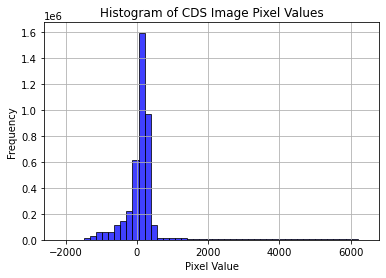

Noise Level: 728.2200350599617
Signal-to-Noise Ratio (SNR): 0.2212868845976785


In [7]:


def load_fits_image(filename):
    """
    Load a FITS image file.
    
    Parameters:
    filename (str): Path to the FITS file.
    
    Returns:
    numpy.ndarray: Image data.
    """
    with fits.open(filename) as hdul:
        image_data = hdul[0].data.astype(np.int32)
    return image_data

def plot_histogram(image_data, title="Histogram of Pixel Values"):
    """
    Plot the histogram of pixel values in the image data.
    
    Parameters:
    image_data (numpy.ndarray): 2D array of pixel values.
    title (str): Title of the histogram plot.
    """
    plt.hist(image_data.flatten(), bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def calculate_noise(image_data):
    """
    Calculate the noise level in the image data.
    
    Parameters:
    image_data (numpy.ndarray): 2D array of pixel values.
    
    Returns:
    float: Standard deviation of the pixel values.
    """
    return np.std(image_data)

def calculate_snr(image_data):
    """
    Calculate the Signal-to-Noise Ratio (SNR) of the image data.
    
    Parameters:
    image_data (numpy.ndarray): 2D array of pixel values.
    
    Returns:
    float: Signal-to-Noise Ratio.
    """
    signal = np.mean(image_data)
    noise = np.std(image_data)
    return signal / noise

# Example usage
if __name__ == "__main__":
    # Load the CDSResult image
    cds_result = load_fits_image('CDSResult.fits')
    
    # Plot the histogram of the CDSResult image
    plot_histogram(cds_result, title="Histogram of CDS Image Pixel Values")
    
    # Calculate and print the noise level
    noise_level = calculate_noise(cds_result)
    print(f"Noise Level: {noise_level}")
    
    # Calculate and print the SNR
    snr = calculate_snr(cds_result)
    print(f"Signal-to-Noise Ratio (SNR): {snr}")
    
    # Additional analyses can be performed here

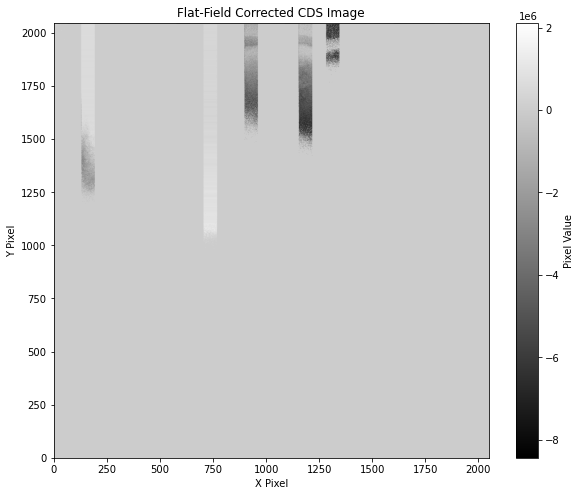

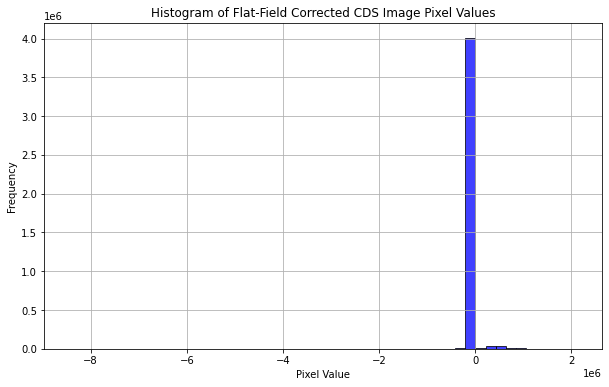

Minimum Pixel Value: -8438779.067622185
Maximum Pixel Value: 2114982.2224617004


In [13]:
def load_fits_image(filename):
    with fits.open(filename) as hdul:
        image_data = hdul[0].data.astype(np.int32)
    return image_data

def flat_field_correction(cds_image, flat_field_image, dark_frame=None):
    if dark_frame is not None:
        cds_image = cds_image - dark_frame
        flat_field_image = flat_field_image - dark_frame
    
    # Avoid division by zero
    flat_field_image[flat_field_image == 0] = 1
    
    # Normalize the flat-field image
    normalized_flat_field = flat_field_image / np.mean(flat_field_image)
    
    # Perform flat-field correction
    corrected_image = cds_image / normalized_flat_field
    
    return corrected_image

def plot_image(image_data, title="Image Data"):
    plt.figure(figsize=(10, 8))
    plt.imshow(image_data, cmap='gray', origin='lower')
    plt.colorbar(label='Pixel Value')
    plt.title(title)
    plt.xlabel('X Pixel')
    plt.ylabel('Y Pixel')
    plt.grid(False)
    plt.show()

def plot_histogram(image_data, title="Histogram of Pixel Values"):
    plt.figure(figsize=(10, 6))
    plt.hist(image_data.flatten(), bins=50, alpha=0.75, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

def extract_min_max_values(image_data):
    min_value = np.min(image_data)
    max_value = np.max(image_data)
    return min_value, max_value

if __name__ == "__main__":
    # Load the images
    cds_image = load_fits_image('CDSResult.fits')
    flat_field_image = load_fits_image('Frame_R01_M01_N02.fits')
    # dark_frame = load_fits_image('DarkFrame.fits')  # Optional
    
    # Perform flat-field correction
    corrected_image = flat_field_correction(cds_image, flat_field_image)
    
    # Plot the corrected image
    plot_image(corrected_image, title="Flat-Field Corrected CDS Image")
    plot_histogram(corrected_image, title="Histogram of Flat-Field Corrected CDS Image Pixel Values")
    
    # Extract and print the minimum and maximum pixel values
    min_value, max_value = extract_min_max_values(corrected_image)
    print(f"Minimum Pixel Value: {min_value}")
    print(f"Maximum Pixel Value: {max_value}")

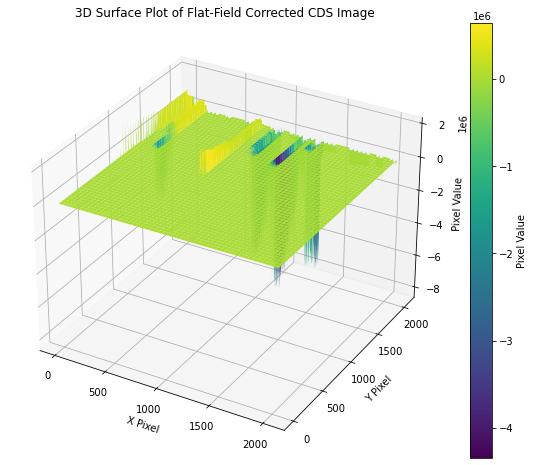

In [9]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_surface(image_data, title="3D Surface Plot of Pixel Values"):
    x = np.arange(image_data.shape[1])
    y = np.arange(image_data.shape[0])
    x, y = np.meshgrid(x, y)
    z = image_data

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, z, cmap='viridis')
    fig.colorbar(surf, ax=ax, label='Pixel Value')
    ax.set_title(title)
    ax.set_xlabel('X Pixel')
    ax.set_ylabel('Y Pixel')
    ax.set_zlabel('Pixel Value')
    plt.show()

# Example usage
if __name__ == "__main__":
    plot_3d_surface(corrected_image, title="3D Surface Plot of Flat-Field Corrected CDS Image")

# analysis

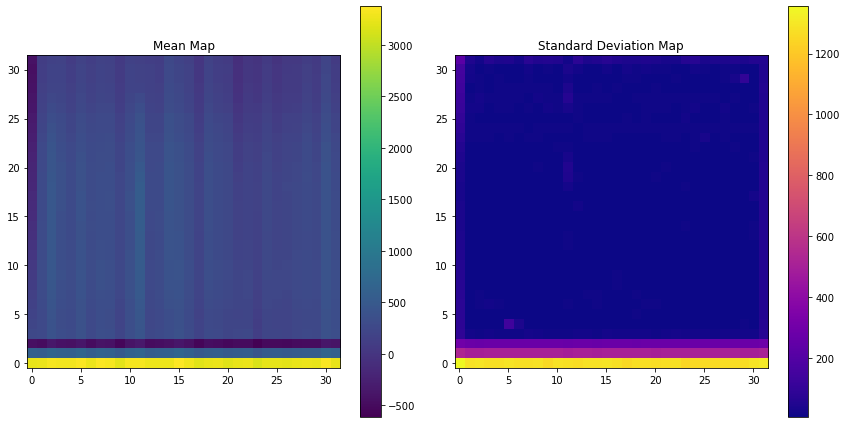

In [3]:
# Load the CDS image
cds_image = fits.getdata('CDS_th/CDSResult.fits')

# Define grid size
grid_size = 64  # Pixels per side
ny, nx = cds_image.shape
mean_map = []
std_map = []

for y in range(0, ny, grid_size):
    row_mean = []
    row_std = []
    for x in range(0, nx, grid_size):
        roi = cds_image[y:y + grid_size, x:x + grid_size]
        row_mean.append(np.mean(roi))
        row_std.append(np.std(roi))
    mean_map.append(row_mean)
    std_map.append(row_std)

# Convert to numpy arrays for visualization
mean_map = np.array(mean_map)
std_map = np.array(std_map)

# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(mean_map, cmap='viridis', origin='lower')
plt.title('Mean Map')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(std_map, cmap='plasma', origin='lower')
plt.title('Standard Deviation Map')
plt.colorbar()
plt.tight_layout()
plt.show()


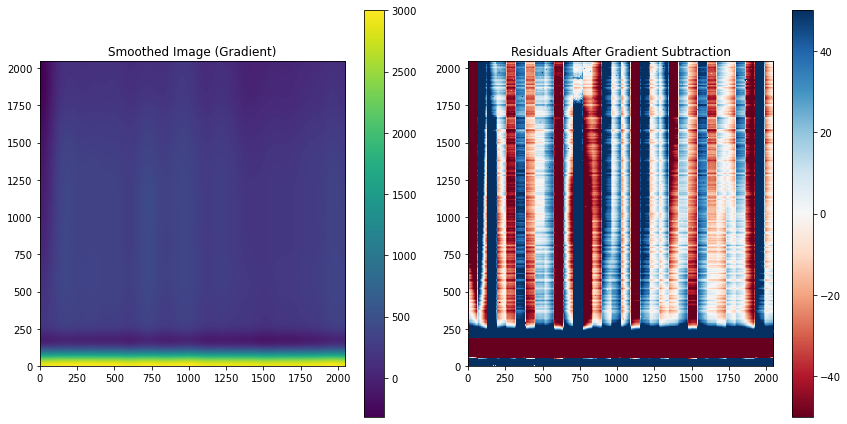

In [4]:
from scipy.ndimage import gaussian_filter
from astropy.modeling import models, fitting

# Smooth the image to identify large-scale gradients
smoothed_image = gaussian_filter(cds_image, sigma=50)

# Subtract the gradient
residuals = cds_image - smoothed_image

# Visualize the gradient and residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(smoothed_image, cmap='viridis', origin='lower')
plt.title('Smoothed Image (Gradient)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(residuals, cmap='RdBu', origin='lower', vmin=-50, vmax=50)
plt.title('Residuals After Gradient Subtraction')
plt.colorbar()
plt.tight_layout()
plt.show()

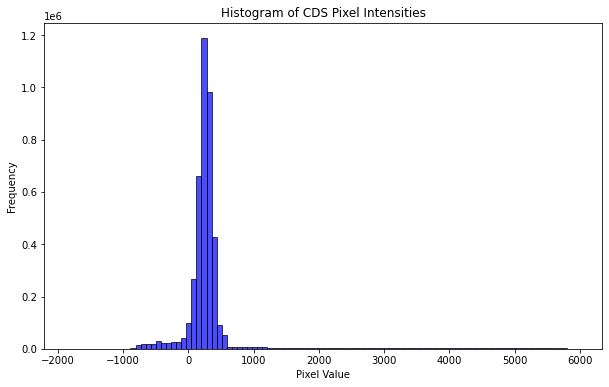

In [6]:
# Flatten the image to a 1D array for histogram plotting
flattened_image = cds_image.flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(flattened_image, bins=100, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of CDS Pixel Intensities')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
# plt.grid()
plt.show()


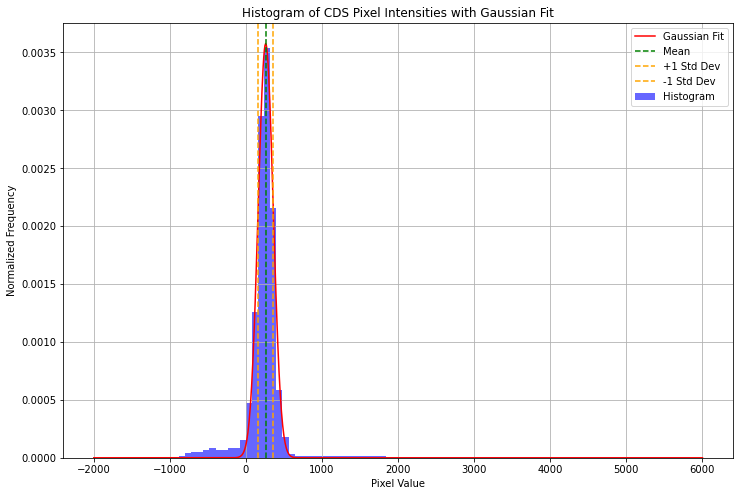

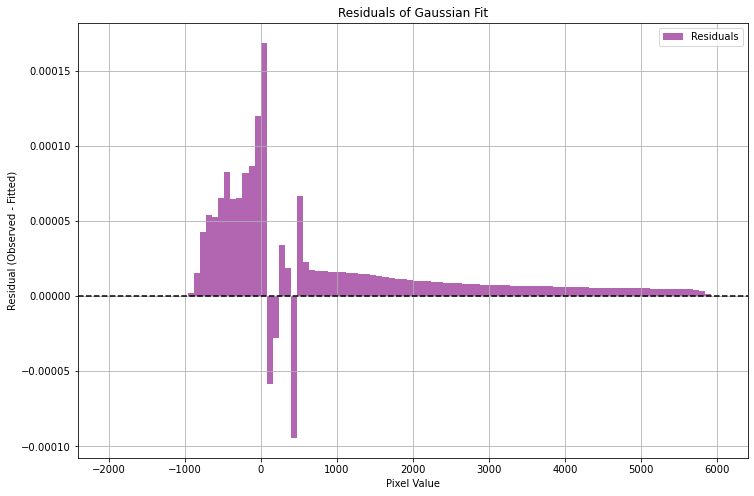

Number of anomalous pixels: 4194304


In [9]:



# Gaussian function
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-0.5 * ((x - mean) / stddev) ** 2)

# Step 1: Prepare histogram
pixel_values = cds_image.flatten()
hist, bin_edges = np.histogram(pixel_values, bins=100, range=(-2000, 6000), density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Step 2: Fit Gaussian
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[1, 0, 100])  # Initial guesses: amplitude=1, mean=0, stddev=100
fitted_amplitude, fitted_mean, fitted_stddev = popt

# Step 3: Plot histogram and Gaussian fit
plt.figure(figsize=(12, 8))
plt.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), color='blue', alpha=0.6, label='Histogram')
x_fit = np.linspace(bin_edges[0], bin_edges[-1], 1000)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', label='Gaussian Fit')
plt.axvline(fitted_mean, color='green', linestyle='--', label='Mean')
plt.axvline(fitted_mean + fitted_stddev, color='orange', linestyle='--', label='+1 Std Dev')
plt.axvline(fitted_mean - fitted_stddev, color='orange', linestyle='--', label='-1 Std Dev')
plt.title("Histogram of CDS Pixel Intensities with Gaussian Fit")
plt.xlabel("Pixel Value")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid()
plt.show()

# Step 4: Analyze Residuals
residuals = hist - gaussian(bin_centers, *popt)
plt.figure(figsize=(12, 8))
plt.bar(bin_centers, residuals, width=(bin_edges[1] - bin_edges[0]), color='purple', alpha=0.6, label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals of Gaussian Fit")
plt.xlabel("Pixel Value")
plt.ylabel("Residual (Observed - Fitted)")
plt.legend()
plt.grid()
plt.show()

# Step 5: Anomaly Detection
anomalous_pixels = pixel_values[(pixel_values > fitted_mean + 3 * fitted_stddev) | 
                                (pixel_values < fitted_mean - 3 * fitted_stddev)]
print(f"Number of anomalous pixels: {len(anomalous_pixels)}")

In [11]:
from sklearn.mixture import GaussianMixture

# Fit a GMM with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(pixel_values.reshape(-1, 1))
labels = gmm.predict(pixel_values.reshape(-1, 1))
means = gmm.means_.flatten()
weights = gmm.weights_
print(f"Gaussian Mixture Means: {means}")
print(f"Gaussian Mixture Weights: {weights}")


Gaussian Mixture Means: [254.43290161 917.5643666 ]
Gaussian Mixture Weights: [0.88952298 0.11047702]


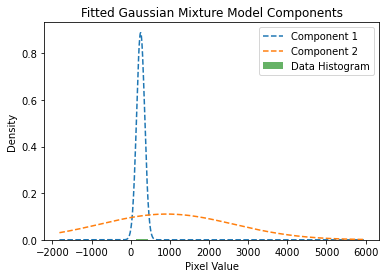

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram of pixel values
plt.hist(pixel_values, bins=100, density=True, alpha=0.6, color='g', label="Data Histogram")

# Plot the GMM components
x = np.linspace(min(pixel_values), max(pixel_values), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

# Plot individual Gaussian components
for i in range(gmm.n_components):
    weight = gmm.weights_[i]
    mean = gmm.means_[i]
    covar = gmm.covariances_[i]
    component = weight * np.exp(-0.5 * (x - mean)**2 / covar)
    plt.plot(x, component, label=f"Component {i+1}", linestyle='--')

plt.title("Fitted Gaussian Mixture Model Components")
plt.xlabel("Pixel Value")
plt.ylabel("Density")
plt.legend()
plt.show()


In [16]:
threshold = means[1] + 3 * np.sqrt(gmm.covariances_[1])
anomalous_pixels = pixel_values > threshold
print(f"Number of anomalous pixels: {np.sum(anomalous_pixels)}")

Number of anomalous pixels: 0


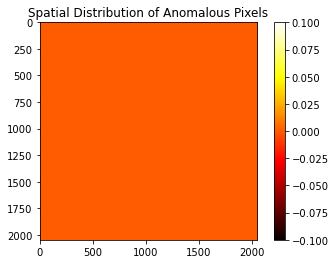

In [13]:
anomalous_map = (cds_image > means.max() + 3 * np.sqrt(gmm.covariances_.max())) | \
                (cds_image < means.min() - 3 * np.sqrt(gmm.covariances_.max()))
plt.imshow(anomalous_map, cmap='hot')
plt.title("Spatial Distribution of Anomalous Pixels")
plt.colorbar()
plt.show()


In [14]:
transformed_pixels = np.log1p(np.abs(pixel_values)) * np.sign(pixel_values)